In [1]:
import os
import pandas as pd

In [2]:
def ratio_day(serie):
    l = [None]
    for i in range(1, len(serie)):
        l.append(serie[i] / serie[i - 1])

    return l

In [3]:
def substract(serie):
    l = [None]
    for i in range(1, len(serie)):
        l.append(serie[i] - serie[i - 1])

    return l

In [4]:
markers = ["o", "*", "v", "s", "p"]
styles = ["-", "-.", "--", ":", "-"]

In [5]:
path_data = os.path.join("csse_covid_19_data", "csse_covid_19_time_series")
file_data = "time_series_19-covid-Confirmed.csv"

In [6]:
data = (
    pd.read_csv(
        os.path.join(path_data, file_data),
        index_col=["Country/Region", "Province/State", "Lat", "Long"],
    )
    .sort_index()
    .T
)
data.index = pd.to_datetime(data.index)
data.head()

Country/Region Afghanistan   Albania   Algeria   Andorra    Angola  \
Province/State         NaN       NaN       NaN       NaN       NaN   
Lat                33.0000   41.1533   28.0339   42.5063  -11.2027   
Long              65.0000   20.1683   1.6596    1.5218    17.8739    
2020-01-22               0         0         0         0         0   
2020-01-23               0         0         0         0         0   
2020-01-24               0         0         0         0         0   
2020-01-25               0         0         0         0         0   
2020-01-26               0         0         0         0         0   

Country/Region Antigua and Barbuda Argentina   Armenia  \
Province/State                 NaN       NaN       NaN   
Lat                        17.0608  -38.4161   40.0691   
Long                     -61.7964  -63.6167   45.0382    
2020-01-22                       0         0         0   
2020-01-23                       0         0         0   
2020-01-24                       0         0         0   
2020-01-25                       0         0         0   
2020-01-26                       0         0         0   

Country/Region                    Australia                        ...  \
Province/State Australian Capital Territory From Diamond Princess  ...   
Lat                                -35.4735               35.4437  ...   
Long                               149.0124              139.6380  ...   
2020-01-22                                0                     0  ...   
2020-01-23                                0                     0  ...   
2020-01-24                                0                     0  ...   
2020-01-25                                0                     0  ...   
2020-01-26                                0                     0  ...   

Country/Region United Kingdom                                         Uruguay  \
Province/State      Gibraltar Isle of Man Montserrat United Kingdom       NaN   
Lat                   36.1408     54.2361    16.7425        55.3781  -32.5228   
Long                -5.3536     -4.5481    -62.1874       -3.4360   -55.7658    
2020-01-22                  0           0          0              0         0   
2020-01-23                  0           0          0              0         0   
2020-01-24                  0           0          0              0         0   
2020-01-25                  0           0          0              0         0   
2020-01-26                  0           0          0              0         0   

Country/Region Uzbekistan Venezuela   Vietnam    Zambia  Zimbabwe  
Province/State        NaN       NaN       NaN       NaN       NaN  
Lat               41.3775   6.4238    16.0000  -15.4167  -20.0000  
Long             64.5853  -66.5897   108.0000  28.2833   30.0000   
2020-01-22              0         0         0         0         0  
2020-01-23              0         0         2         0         0  
2020-01-24              0         0         2         0         0  
2020-01-25              0         0         2         0         0  
2020-01-26              0         0         2         0         0  

[5 rows x 487 columns]

## Total

In [7]:
confirmed = pd.DataFrame(index=data.index)

In [8]:
confirmed["Total"] = data.sum(axis=1)

In [9]:
confirmed["ratio_tot"] = ratio_day(confirmed["Total"])

In [10]:
confirmed["ratio_diff_tot"] = substract(confirmed["ratio_tot"])

## W/o China

In [11]:
confirmed["Total_wo_China"] = confirmed["Total"] - data.loc[:, "China"].sum(axis=1)

In [12]:
confirmed["ratio_wo_China"] = ratio_day(confirmed["Total_wo_China"])

In [13]:
confirmed["ratio_diff_wo_China"] = substract(confirmed["ratio_wo_China"])

## Canada

In [14]:
confirmed["Total_Can"] = data.loc[:, "Canada"].sum(axis=1)

In [15]:
confirmed["ratio_Can"] = ratio_day(confirmed["Total_Can"])

/Users/leroylouis/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in long_scalars
  after removing the cwd from sys.path.
/Users/leroylouis/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in long_scalars
  after removing the cwd from sys.path.


In [16]:
confirmed["ratio_diff_Can"] = substract(confirmed["ratio_Can"])

## Quebec

In [17]:
confirmed["Total_Qc"] = data.loc[:, ("Canada", "Quebec")].sum(axis=1)

In [18]:
confirmed["ratio_Qc"] = ratio_day(confirmed["Total_Qc"])

/Users/leroylouis/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in long_scalars
  after removing the cwd from sys.path.
/Users/leroylouis/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in long_scalars
  after removing the cwd from sys.path.


In [19]:
confirmed["ratio_diff_Qc"] = substract(confirmed["ratio_Qc"])

## France (métropole)

In [20]:
confirmed["Total_Fra"] = data.loc[:, ("France", "France")].sum(axis=1)

In [21]:
confirmed["ratio_Fra"] = ratio_day(confirmed["Total_Fra"])

/Users/leroylouis/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in long_scalars
  after removing the cwd from sys.path.
/Users/leroylouis/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in long_scalars
  after removing the cwd from sys.path.


In [22]:
confirmed["ratio_diff_Fra"] = substract(confirmed["ratio_Fra"])

## Tables

In [28]:
confirmed[["Total", "Total_wo_China", "Total_Can", "Total_Qc", "Total_Fra"]].tail()

,Total,Total_wo_China,Total_Can,Total_Qc,Total_Fra
2020-03-18,214910,133808,657,94,9043
2020-03-19,242708,161552,800,121,10871
2020-03-20,272166,190916,943,139,12612
2020-03-21,304524,223219,1278,181,14282
2020-03-22,335955,254558,1465,219,16018


In [23]:
confirmed[["ratio_tot", "ratio_wo_China", "ratio_Can", "ratio_Qc", "ratio_Fra"]].tail()

,ratio_tot,ratio_wo_China,ratio_Can,ratio_Qc,ratio_Fra
2020-03-18,1.090128,1.152683,1.374477,1.270270,1.181783
2020-03-19,1.129347,1.207342,1.217656,1.287234,1.202145
2020-03-20,1.121372,1.181762,1.178750,1.148760,1.160151
2020-03-21,1.118891,1.169200,1.355249,1.302158,1.132414
2020-03-22,1.103214,1.140396,1.146322,1.209945,1.121552


In [24]:
confirmed[
    [
        "ratio_diff_tot",
        "ratio_diff_wo_China",
        "ratio_diff_Can",
        "ratio_diff_Qc",
        "ratio_diff_Fra",
    ]
].tail()

,ratio_diff_tot,ratio_diff_wo_China,ratio_diff_Can,ratio_diff_Qc,ratio_diff_Fra
2020-03-18,0.004108,-0.002451,0.222670,-0.209730,0.028157
2020-03-19,0.039219,0.054659,-0.156821,0.016964,0.020363
2020-03-20,-0.007975,-0.025580,-0.038906,-0.138474,-0.041994
2020-03-21,-0.002482,-0.012562,0.176499,0.153398,-0.027737
2020-03-22,-0.015677,-0.028804,-0.208927,-0.092214,-0.010862


## Plots

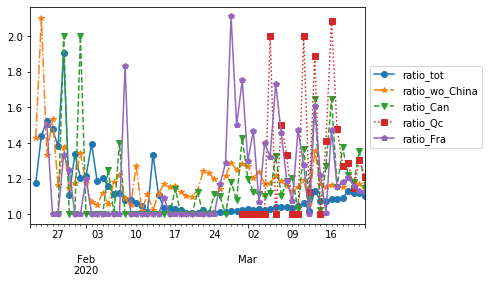

In [25]:
# Ratio
ax_ratio = confirmed[
    ["ratio_tot", "ratio_wo_China", "ratio_Can", "ratio_Qc", "ratio_Fra"]
].plot()
for i, line in enumerate(ax_ratio.get_lines()):
    line.set_marker(markers[i])
    line.set_linestyle(styles[i])
ax_ratio.legend(bbox_to_anchor=(1, 0.75))

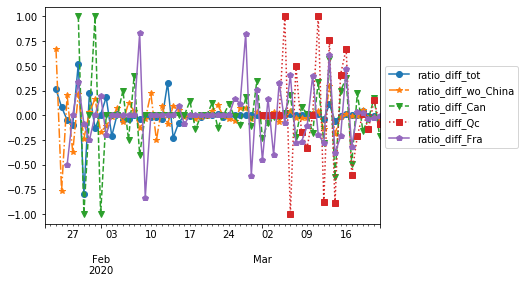

In [29]:
# Ratio diff
ax_ratio = confirmed[
    [
        "ratio_diff_tot",
        "ratio_diff_wo_China",
        "ratio_diff_Can",
        "ratio_diff_Qc",
        "ratio_diff_Fra",
    ]
].plot()
for i, line in enumerate(ax_ratio.get_lines()):
    line.set_marker(markers[i])
    line.set_linestyle(styles[i])
ax_ratio.legend(bbox_to_anchor=(1, 0.75))

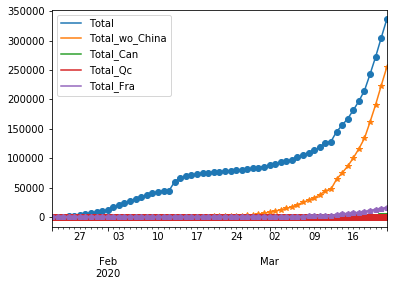

In [26]:
# Cases
ax_total = confirmed[
    ["Total", "Total_wo_China", "Total_Can", "Total_Qc", "Total_Fra"]
].plot()
for i, line in enumerate(ax_total.get_lines()):
    line.set_marker(markers[i])